## Lasso Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

### Numerical Data

In [2]:
tic = time.time()

In [3]:
flights = pd.read_csv('data/flights_clean.csv').sample(10000)
flights

,airline,day,day_of_week,departure_delay,destination_airport,destination_latitude,destination_longitude,distance,month,origin_airport,...,scheduled_arrival,scheduled_departure,scheduled_time,state_destination,state_origin,taxi_in,taxi_out,day_of_year,origin_temperature,destination_temperature
3682225,EV,27,1,-6.0,JAX,30.49406,-81.68786,833,7,LGA,...,972,809,163.0,FL,NY,8.0,19.0,208,79.9,80.3
3322949,DL,25,3,-5.0,SFO,37.61900,-122.37484,2586,11,JFK,...,901,690,391.0,CA,NY,5.0,28.0,329,44.0,48.8
1472437,UA,21,3,7.0,SLC,40.78839,-111.97777,391,1,DEN,...,596,502,94.0,UT,CO,9.0,38.0,21,29.4,32.7
3026747,WN,13,7,3.0,MCI,39.29761,-94.71391,460,9,DAL,...,625,540,85.0,MO,TX,5.0,9.0,256,76.5,62.5
653748,OO,6,1,-8.0,DEN,39.85841,-104.66700,844,7,FAT,...,800,598,142.0,CO,CA,5.0,12.0,187,82.7,63.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994986,B6,8,2,-5.0,BWI,39.17540,-76.66820,369,9,BOS,...,1260,1165,95.0,MD,MA,6.0,16.0,251,81.2,79.6
3957786,EV,22,3,4.0,TYS,35.81249,-83.99286,475,7,ORD,...,669,510,99.0,TN,IL,7.0,20.0,203,73.6,79.2
3433614,WN,10,4,4.0,SLC,40.78839,-111.97777,368,12,LAS,...,855,715,80.0,UT,NV,6.0,14.0,344,52.1,47.1
3584947,WN,19,1,-1.0,LAX,33.94254,-118.40807,337,1,SFO,...,555,470,85.0,CA,CA,24.0,9.0,19,57.1,58.0


In [4]:
pre_y = flights.departure_delay

In [5]:
# drop categorical columns
pre_X = flights.drop(columns=['departure_delay', 'airline', 'destination_airport',
                              'origin_airport', 'state_destination', 'state_origin'])

In [6]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [7]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [8]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [9]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.843e+04, tolerance: 1.395e+03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.289e+05, tolerance: 1.395e+03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Text(0, 0.5, 'Standardized coefficient')

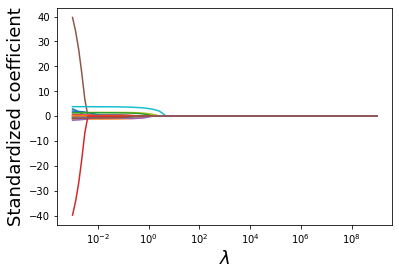

In [10]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')

In [11]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.5811612343399264

Text(0, 0.5, 'Cross-validation error')

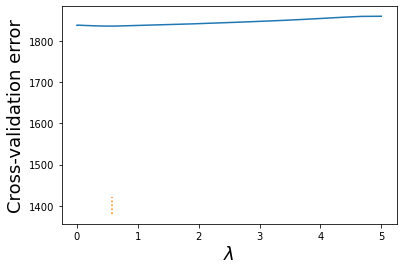

In [12]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[1380,1420],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

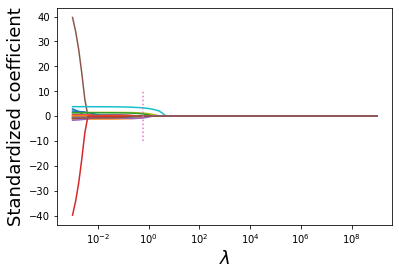

In [13]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.plot([lassocv.alpha_,lassocv.alpha_],[-10,10],':')

In [14]:
Xtest_std = scaler.transform(X_test)

In [15]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [16]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

41.0926040175769

Numerical Lasso RMSE = 41.093

In [17]:
y_test.std()

41.4815275395063

In [18]:
toc = time.time()
toc - tic

48.57084631919861

### Numerical + Categorical + Variable Transformations

In [303]:
tic_dummy = time.time()

In [304]:
flights = pd.read_csv('data/flights_clean_numerical_significant.csv').sample(10000)
flights

,day,day_of_week,day_of_year,departure_delay,destination_latitude,destination_longitude,destination_temperature,distance,month,origin_latitude,...,destination_airport_BTV,destination_airport_DTW,destination_airport_FNT,origin_airport_CMH,origin_airport_IAD,origin_airport_LNK,origin_airport_RIC,state_destination_MI,state_destination_VT,state_origin_NE
2649321,9,4,190,-6.0,38.74769,-90.35999,68.8,882,7,28.42889,...,0,0,0,0,0,0,0,0,0,0
1146234,9,1,313,4.0,41.97960,-87.90446,41.7,286,11,38.17439,...,0,0,0,0,0,0,0,0,0,0
731811,19,7,200,5.0,33.43417,-112.00806,83.9,2917,7,21.31869,...,0,0,0,0,0,0,0,0,0,0
3797474,20,1,201,-3.0,42.88082,-85.52277,71.9,640,7,33.64044,...,0,0,0,0,0,0,0,1,0,0
130330,6,5,65,32.0,33.43417,-112.00806,65.8,370,3,33.94254,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284915,19,4,323,-4.0,42.21206,-83.34884,54.9,166,11,39.90238,...,0,1,0,0,0,0,0,1,0,0
2180831,24,5,114,-3.0,39.87195,-75.24114,46.5,678,4,41.97960,...,0,0,0,0,0,0,0,0,0,0
3458217,13,7,347,-1.0,28.42889,-81.31603,70.5,787,12,39.17540,...,0,0,0,0,0,0,0,0,0,0
3396687,5,6,339,-4.0,29.98047,-95.33972,48.2,854,12,28.42889,...,0,0,0,0,0,0,0,0,0,0


Add variable transformations and binned variables to the data (binned as dummy columns):\
This is based on the insights discovered during EDA.

In [305]:
flights['log_distance'] = np.log(flights.distance)
flights['log_scheduled_time'] = np.log(flights.scheduled_time)
flights['log_taxi_in'] = np.log(flights.taxi_in)
flights['log_taxi_out'] = np.log(flights.taxi_out)

flights = pd.concat([flights, pd.get_dummies(pd.cut(flights.destination_latitude, 4),
                                             prefix='destination_latitude')], axis=1)
flights = pd.concat([flights, pd.get_dummies(pd.cut(flights.destination_longitude, 4),
                                             prefix='destination_longitude')], axis=1)
flights = pd.concat([flights, pd.get_dummies(pd.cut(flights.origin_latitude, 4),
                                             prefix='origin_latitude')], axis=1)
flights = pd.concat([flights, pd.get_dummies(pd.cut(flights.origin_longitude, 4),
                                             prefix='origin_longitude')], axis=1)

flights = pd.concat([flights, pd.get_dummies(pd.cut(flights.day_of_year, 8), prefix='day_of_year')], axis=1)

In [306]:
pre_y = flights.departure_delay

In [307]:
pre_X = flights.drop(columns=['departure_delay'])

In [308]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [309]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [310]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [311]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'Standardized coefficient')

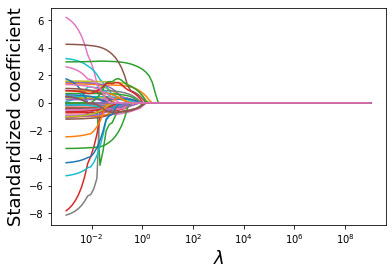

In [312]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')

In [313]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722.277125330642, tolerance: 875.5931899407406
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3967.7188914688304, tolerance: 875.5931899407406
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4230.345108923502, tolerance: 875.5931899407406
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4282.482885020785, tolerance: 875.5931899407406
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4282.18975894805, tolerance: 875.5931899407406
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4281.9124943381175, tolerance: 875.5931899407406
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4288.446981867775, tolerance: 875.5931899407406
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4288.637037362903, tolerance: 875.5931899407406
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4288.717492750846, tolerance: 875.5931899407406
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4408.808796130121, tolerance: 923.5149961629628
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4408.2379904948175, tolerance: 923.5149961629628
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4407.640205476433, tolerance: 923.5149961629628
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4398.144474327564, tolerance: 923.5149961629628
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.952424893156, tolerance: 923.5149961629628
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.771762181073, tolerance: 923.5149961629628
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4395.252033425495, tolerance: 923.5149961629628
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4395.21148645319, tolerance: 923.5149961629628
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4395.17758092843, tolerance: 923.5149961629628
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_mo

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4744.957439348102, tolerance: 900.4350344296287
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4744.241652907804, tolerance: 900.4350344296287
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4743.538322750479, tolerance: 900.4350344296287
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4733.266650944948, tolerance: 900.4350344296287
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4733.0935262758285, tolerance: 900.4350344296287
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4732.92033578828, tolerance: 900.4350344296287
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4730.637390850112, tolerance: 900.4350344296287
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4730.478724904358, tolerance: 900.4350344296287
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4730.30841274187, tolerance: 900.4350344296287
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_m

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4114.8297603633255, tolerance: 787.8504838666663
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4114.036300312728, tolerance: 787.8504838666663
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4113.263423933648, tolerance: 787.8504838666663
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4102.6444067256525, tolerance: 787.8504838666663
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4110.373244095594, tolerance: 787.8504838666663
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4111.793780537322, tolerance: 787.8504838666663
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4109.660414185375, tolerance: 787.8504838666663
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4108.108942735009, tolerance: 787.8504838666663
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4108.025111827999, tolerance: 787.8504838666663
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4322.8670866359025, tolerance: 885.3814637185179
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4322.413225770928, tolerance: 885.3814637185179
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4321.979406887665, tolerance: 885.3814637185179
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4326.008966605179, tolerance: 885.3814637185179
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4325.949131416157, tolerance: 885.3814637185179
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4325.877208629623, tolerance: 885.3814637185179
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4323.206607501954, tolerance: 885.3814637185179
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2528.773928619921, tolerance: 896.7996454666671
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4179.0124861449, tolerance: 896.7996454666671
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_mo

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4627.337208671495, tolerance: 896.7996454666671
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4626.990360401571, tolerance: 896.7996454666671
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4626.656023563817, tolerance: 896.7996454666671
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4622.493858521804, tolerance: 896.7996454666671
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4622.443686142564, tolerance: 896.7996454666671
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4622.351627362892, tolerance: 896.7996454666671
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4358.637898674235, tolerance: 902.9614818518526
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4359.727565350011, tolerance: 902.9614818518526
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4359.57475406304, tolerance: 902.9614818518526
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_m

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4349.779796220362, tolerance: 902.9614818518526
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4349.591039512306, tolerance: 902.9614818518526
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4349.406450776383, tolerance: 902.9614818518526
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4346.917813602835, tolerance: 902.9614818518526
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4346.752614825964, tolerance: 902.9614818518526
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4346.7677422259, tolerance: 902.9614818518526
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_mo

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4259.881729019806, tolerance: 905.7688266074081
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4259.323054261506, tolerance: 905.7688266074081
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4258.767680441961, tolerance: 905.7688266074081
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4265.198718123138, tolerance: 905.7688266074081
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4265.015026340261, tolerance: 905.7688266074081
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4264.878233965486, tolerance: 905.7688266074081
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4262.725930178538, tolerance: 905.7688266074081
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4262.629639821127, tolerance: 905.7688266074081
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4262.51913902536, tolerance: 905.7688266074081
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_m

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4688.513941782527, tolerance: 885.985919466666
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4689.817409329116, tolerance: 885.985919466666
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4689.6907849079, tolerance: 885.985919466666
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4478.548725760542, tolerance: 885.985919466666
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4631.18100550957, tolerance: 885.985919466666
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4690.636516571045, tolerance: 885.985919466666
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4703.195090904832, tolerance: 885.985919466666
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4703.104143601842, tolerance: 885.985919466666
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4703.025517914444, tolerance: 885.985919466666
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_mod

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4342.357379633933, tolerance: 903.7304186074075
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4342.253951949999, tolerance: 903.7304186074075
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4342.152160147205, tolerance: 903.7304186074075
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4340.9151613060385, tolerance: 903.7304186074075
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4340.846778128296, tolerance: 903.7304186074075
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4340.833310857415, tolerance: 903.7304186074075
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear

0.06754967605990136

Text(0, 0.5, 'Cross-validation error')

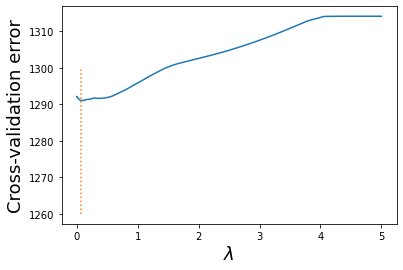

In [314]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[1260,1300],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

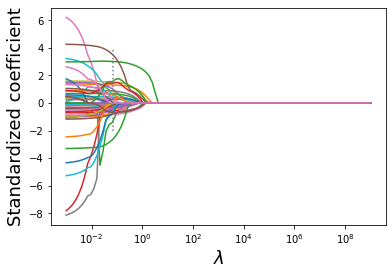

In [315]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.plot([lassocv.alpha_,lassocv.alpha_],[-2,4],':')

In [316]:
Xtest_std = scaler.transform(X_test)

In [317]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [318]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

34.526217933807565

Numerical + Select Categorical + Variable Transformations Lasso RMSE = 34.526

In [319]:
y_test.std()

35.09391640366495

In [320]:
toc_dummy = time.time()
toc_dummy - tic_dummy

228.10442328453064

In [321]:
lasso.coef_

array([-2.80061930e-01, -4.10926826e-01, -1.40843497e+00,  0.00000000e+00,
        0.00000000e+00, -4.76173587e-01, -0.00000000e+00, -0.00000000e+00,
        8.38358183e-01,  5.92645776e-01, -4.79042507e-01,  1.29589274e+00,
        3.00756180e+00, -0.00000000e+00,  1.01639522e+00,  3.50971473e+00,
       -8.32837212e-01,  8.72424457e-01,  1.50934434e+00,  4.26375565e-01,
       -8.11656998e-02, -2.40463937e-01,  6.60775111e-01, -5.88642593e-01,
       -3.84632347e-01, -2.94619246e-01, -4.43162295e-01,  7.49645049e-05,
        3.53779345e-01,  3.61776499e-01, -0.00000000e+00, -6.22059529e-01,
       -2.65184127e+00, -0.00000000e+00,  3.16994370e-01, -8.06106279e-01,
       -0.00000000e+00, -1.21631796e-01,  0.00000000e+00, -2.67982897e-01,
        2.39961868e-01,  6.05813743e-01,  0.00000000e+00, -1.92634471e-01,
       -3.95085289e-01,  5.57422955e-02,  3.38428175e-01, -0.00000000e+00,
       -0.00000000e+00, -8.07627208e-01, -8.05485456e-01,  0.00000000e+00,
        1.53883010e+00,  

Current best model:

In [322]:
print('departure_delay =')
for i in range(len(X.columns)):
    if lasso.coef_[i] != 0:
        print('{:+3f} * {}'.format(lasso.coef_[i], X.columns[i]))

departure_delay =
-0.280062 * day
-0.410927 * day_of_week
-1.408435 * day_of_year
-0.476174 * destination_temperature
+0.838358 * origin_latitude
+0.592646 * origin_longitude
-0.479043 * origin_temperature
+1.295893 * scheduled_arrival
+3.007562 * scheduled_departure
+1.016395 * taxi_in
+3.509715 * taxi_out
-0.832837 * airline_AS
+0.872424 * airline_NK
+1.509344 * airline_UA
+0.426376 * destination_airport_BTV
-0.081166 * destination_airport_DTW
-0.240464 * destination_airport_FNT
+0.660775 * origin_airport_CMH
-0.588643 * origin_airport_IAD
-0.384632 * origin_airport_LNK
-0.294619 * origin_airport_RIC
-0.443162 * state_destination_MI
+0.000075 * state_destination_VT
+0.353779 * state_origin_NE
+0.361776 * log_distance
-0.622060 * log_taxi_in
-2.651841 * log_taxi_out
+0.316994 * destination_latitude_(32.192, 43.066]
-0.806106 * destination_latitude_(43.066, 53.94]
-0.121632 * destination_longitude_(-158.01, -136.019]
-0.267983 * destination_longitude_(-114.116, -92.212]
+0.239962 * des